### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


#### Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 
 

#### Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.


#### Model Evaluation:
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

 

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
 

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.
 
#### Submissions Expected:

**Python Notebook**: One Python notebook with the whole linear model, predictions, and evaluation.
Subjective Questions PDF: Apart from the Python notebook, you also need to answer some subjective questions related to linear regression which can be downloaded from the file below. Answer these questions and submit it as a PDF. 

**Note:** There are some questions in the subjective questions doc that you might not be familiar with. So you're expected to research these questions and give an appropriate answer in order to expand your learnings of this topic.

### Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [1]:
# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing Numpy & Pandas Library
import numpy as np
import pandas as pd

In [3]:
# Reading Dataset
bikes = pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
557,558,12-07-2019,3,1,7,0,5,1,1,29.349153,32.73415,52.9583,9.833925,1032,6414,7446
73,74,15-03-2018,1,0,3,0,4,1,2,13.013031,15.90890,65.5652,12.348703,289,1767,2056
381,382,17-01-2019,1,1,1,0,4,1,2,15.294763,18.21390,71.6087,23.391710,127,2808,2935
113,114,24-04-2018,2,0,4,0,2,1,2,23.848347,27.58815,81.0833,12.875725,1710,2481,4191
124,125,05-05-2018,2,0,5,0,6,0,1,18.825847,22.09585,44.4167,19.791264,614,3819,4433


Inspectiing the various aspects of the housing dataframe

In [5]:
bikes.shape

(730, 16)

In [6]:
# Checking the Null Values & Data Types of Different Columns
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**So, none of the column has missing values.**

In [7]:
# Checking brief summary of numerical variables
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Summary:** 
- Given data has 730 rows and 16 columns.

- Columns data types -- float-(4), int-(11), object-(1)

- Columns- "season" & "weathersit" are categorical in actual nature but are "integer" in data type. We will analyze and see if we require to convert it to categorical or treat them as it is.

### Step 1.1: Removing Extra or Unwanted Columns

By looking at dataset and data dictionary, the following variables can be removed from further analysis:

1. instant : It is the index number of rows. It will not contribute in our analysis.

2. dteday : As we already have "year" as "yr" and "month" as "mnth" column we do not require data column separetly. So, we can drop it.

3. casual and registered : "**casual+registered = total count of bikes**" given in "cnt" column. This is our target variable. So, we can drop these 2 columns.

In [8]:
bikes.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
bikes.shape

(730, 12)

In [10]:
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Step 1.2 Data Cleaning & Mapping

In [11]:
#Now for better interpretability, mapping the categorical variables in actual terms from data dictionary.
#These numeric values associated with the labels may indicate that there is some order to them, which is actually not the case.
#Mapping variables-season, mnth, weathersit, weekday

bikes['season']=bikes.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bikes['mnth']=bikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikes['weathersit']=bikes.weathersit.map({1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})
bikes['weekday']=bikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


#### In case of "weathersit" as the names are longer rewritting them as follows:
1. 'Clear, Few clouds, Partly cloudy, Partly cloudy --> Clear
2. 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist --> Mist + Cloudy
3. 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds --> Light Snow 
4. 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' --> Heavy Rain


In [12]:
bikes['weathersit']=bikes.weathersit.map({'Clear, Few clouds, Partly cloudy, Partly cloudy':'Clear','Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist': 'Mist + Cloudy','Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds': 'Light Snow','Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog': 'Heavy Rain'})
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [14]:
# Converting 'Oobject' datatype to 'category' data type

bikes['season']=bikes['season'].astype('category')
bikes['weathersit']=bikes['weathersit'].astype('category')
bikes['mnth']=bikes['mnth'].astype('category')
bikes['weekday']=bikes['weekday'].astype('category')

In [15]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [16]:
bikes.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Step 2: Visualising the Data

We'll visualise our data using `matplotlib` and `seaborn`.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

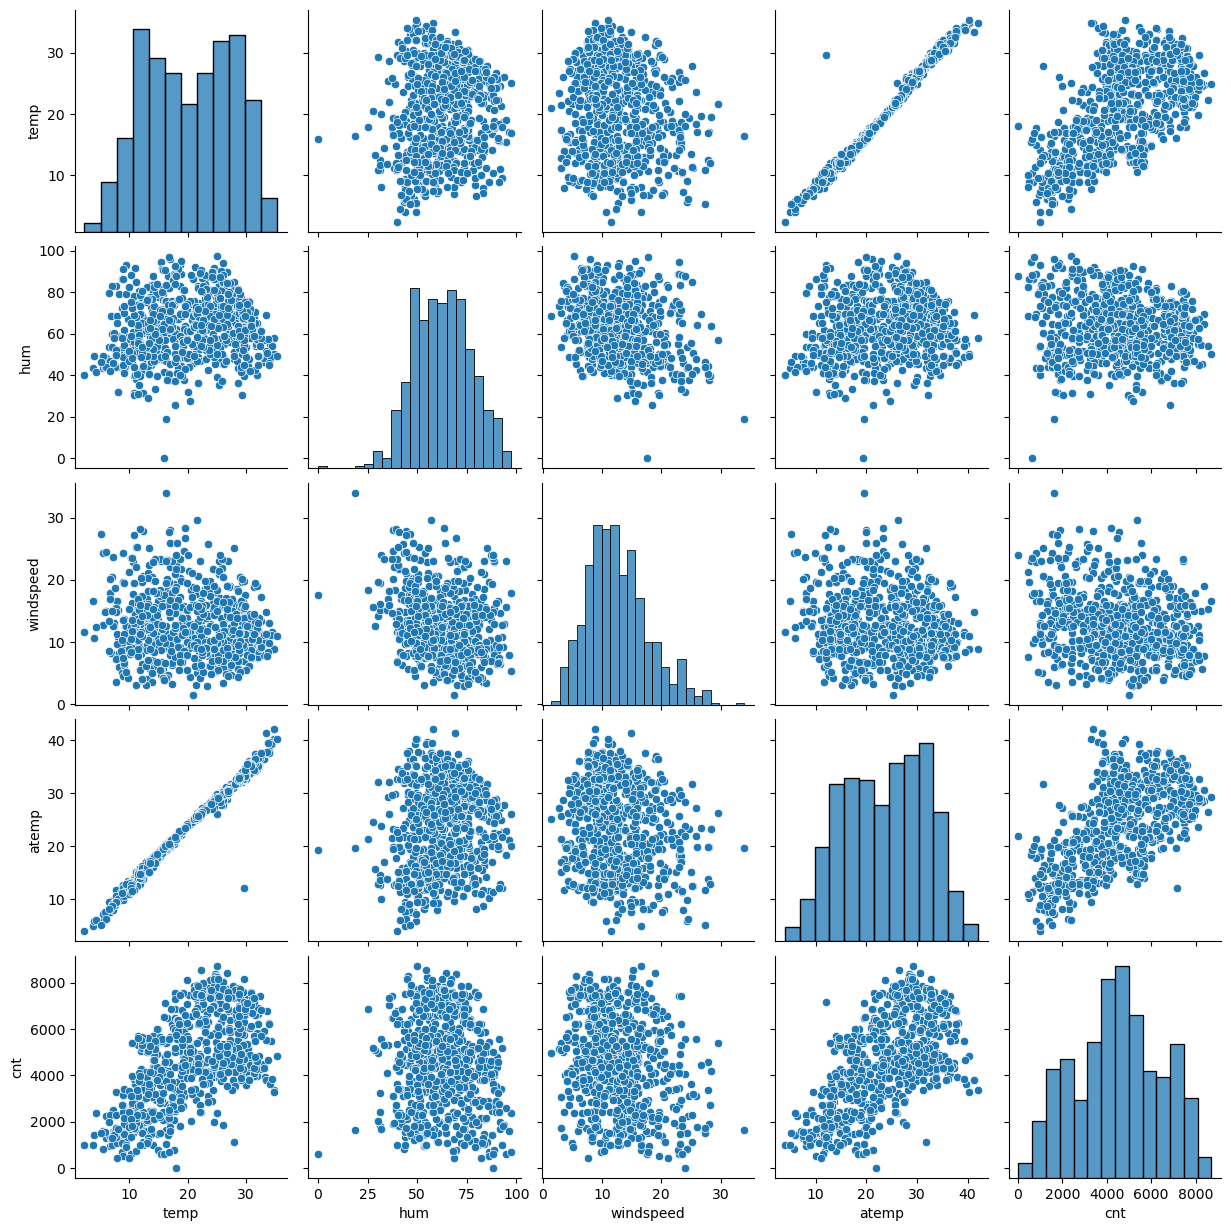

In [18]:
# Let's make a pairplot of all the numeric variables
sns.pairplot(bikes, vars=["temp", "hum",'windspeed','atemp','cnt'])
plt.show()

From the Scatter Pair-Plot we can infer that there is a sort of linear relationship between 'temp','atemp' and 'cnt'.

**Visualising Categorical & Binary Variables**

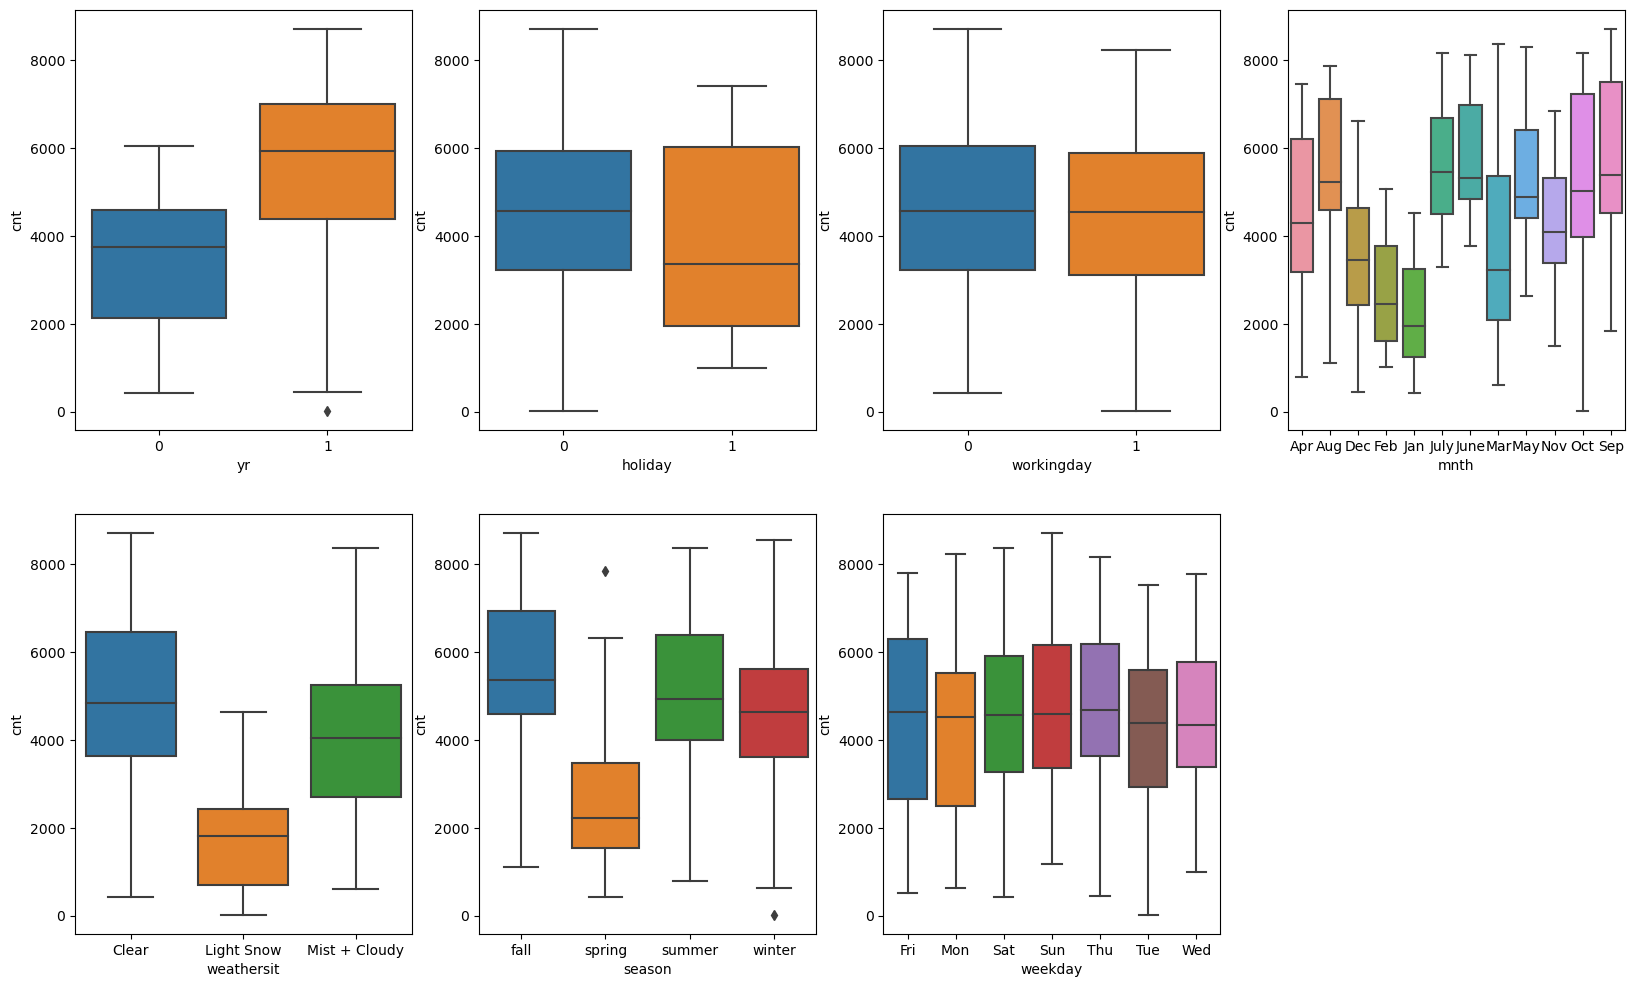

In [19]:
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)

plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)

plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)

plt.show()

By an overview of above graphs

**Summary:**
- Bike Rentals are more:
  - in the year 2019 compared to 2018.
  - Non Holiday
  - Almost similar on working or non working (median values)
  - Sep, Oct and Aug Month.
  - during the Fall season and then in summer
  - on Clear Weather.
  - on Sunday, Friday and Thursday


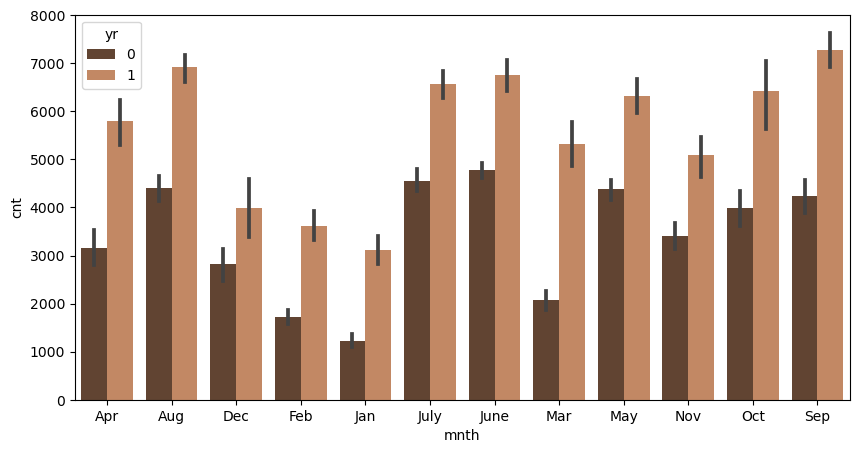

In [20]:
#Viewing Categorical features parallely 
#Relation between month and Rentals with year
plt.figure(figsize=(10,5))
sns.barplot('mnth','cnt', hue='yr', data=bikes, palette='copper')
plt.show()

From above it is clear that "Bike Rentals" are more in the year 2019 as compared to 2018 and on month on month basis also.

### Heatmap

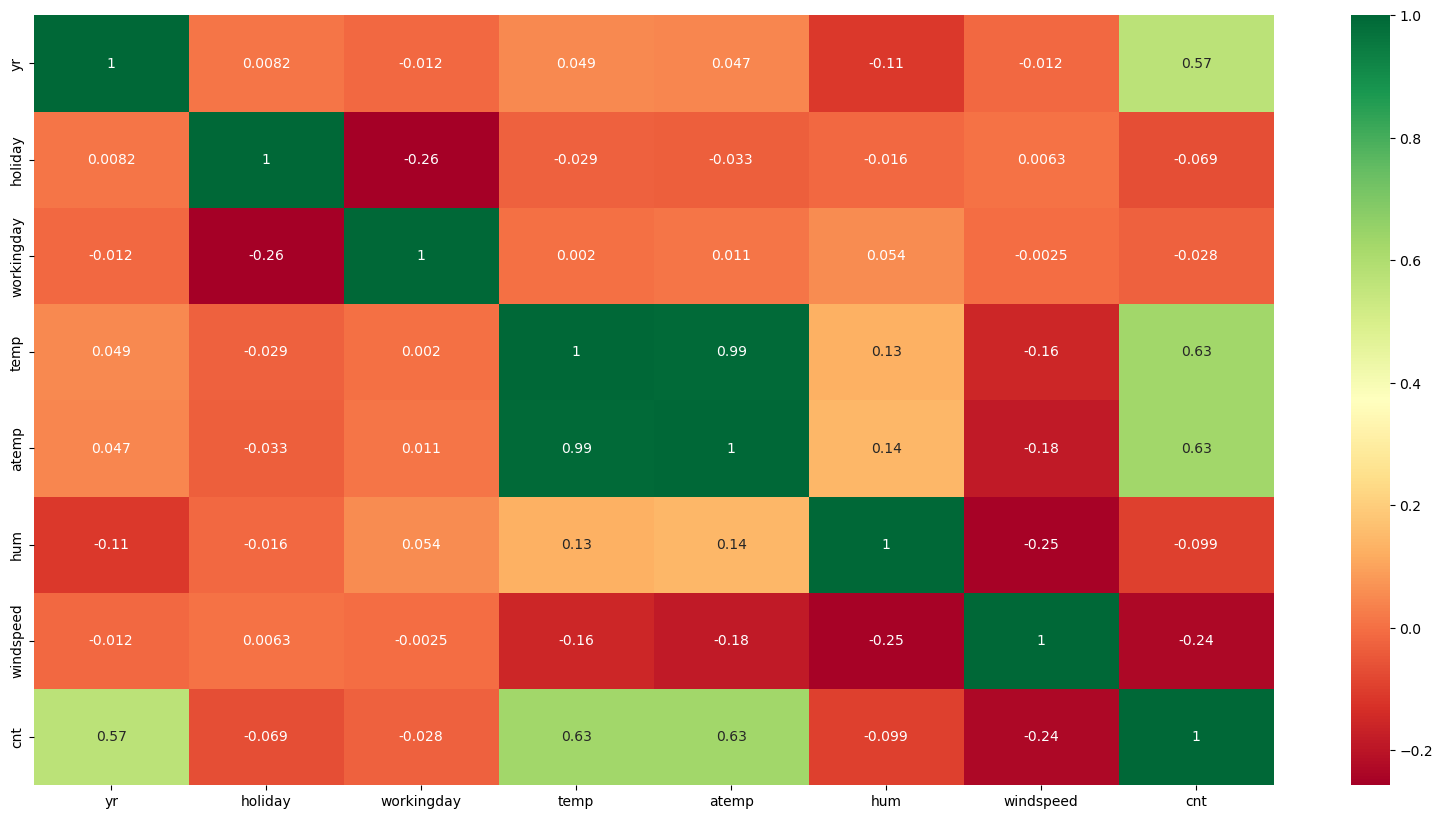

In [21]:
#Plotting Heatmap to see correlation between variables
plt.figure(figsize=(20, 10))
sns.heatmap(bikes.corr(), cmap='RdYlGn', annot = True)
plt.show()

- From the correlation matrix, we can clearly see that apart from relation of dependent and independent variables, two dependent variables namely "atemp" and "temp" are highly correlated from the case of multicollinearity.

- At this point of time we are keeping them but we have to drop one of them in later stage of model buiding.

### Step 3: Data Preparation

In [22]:
#For better clearity and understanding - Renaming the columns
bikes.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'rental_counts'}, inplace = True) 
bikes.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,rental_counts
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
## Converting the Categorical Variable to Dummy Variables for Analysis
## Creating Dummy Variables for Categorical Variables- month, season, weathersit, weekday)
## Also, as we required n-1 dummies for n levels of category, we will drop the first column also.
months=pd.get_dummies(bikes.month, drop_first=True)
weekdays=pd.get_dummies(bikes.weekday, drop_first=True)
weathersit=pd.get_dummies(bikes.weathersit, drop_first=True)
seasons=pd.get_dummies(bikes.season, drop_first=True)

In [24]:
## Adding the results to the original dataframe

bikes=pd.concat([bikes,months,weekdays,weathersit,seasons],axis=1)
bikes.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [25]:
bikes.weathersit.unique()

['Mist + Cloudy', 'Clear', 'Light Snow']
Categories (3, object): ['Clear', 'Light Snow', 'Mist + Cloudy']

In [26]:
bikes.season.unique()

['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['fall', 'spring', 'summer', 'winter']

In [27]:
bikes.weekday.unique()

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [28]:
# Dropping 'season','month','weekday','weathersit' as we have created Dummies

bikes.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bikes.head()

,Year,holiday,workingday,temp,atemp,humidity,windspeed,rental_counts,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
bikes.shape

(730, 30)

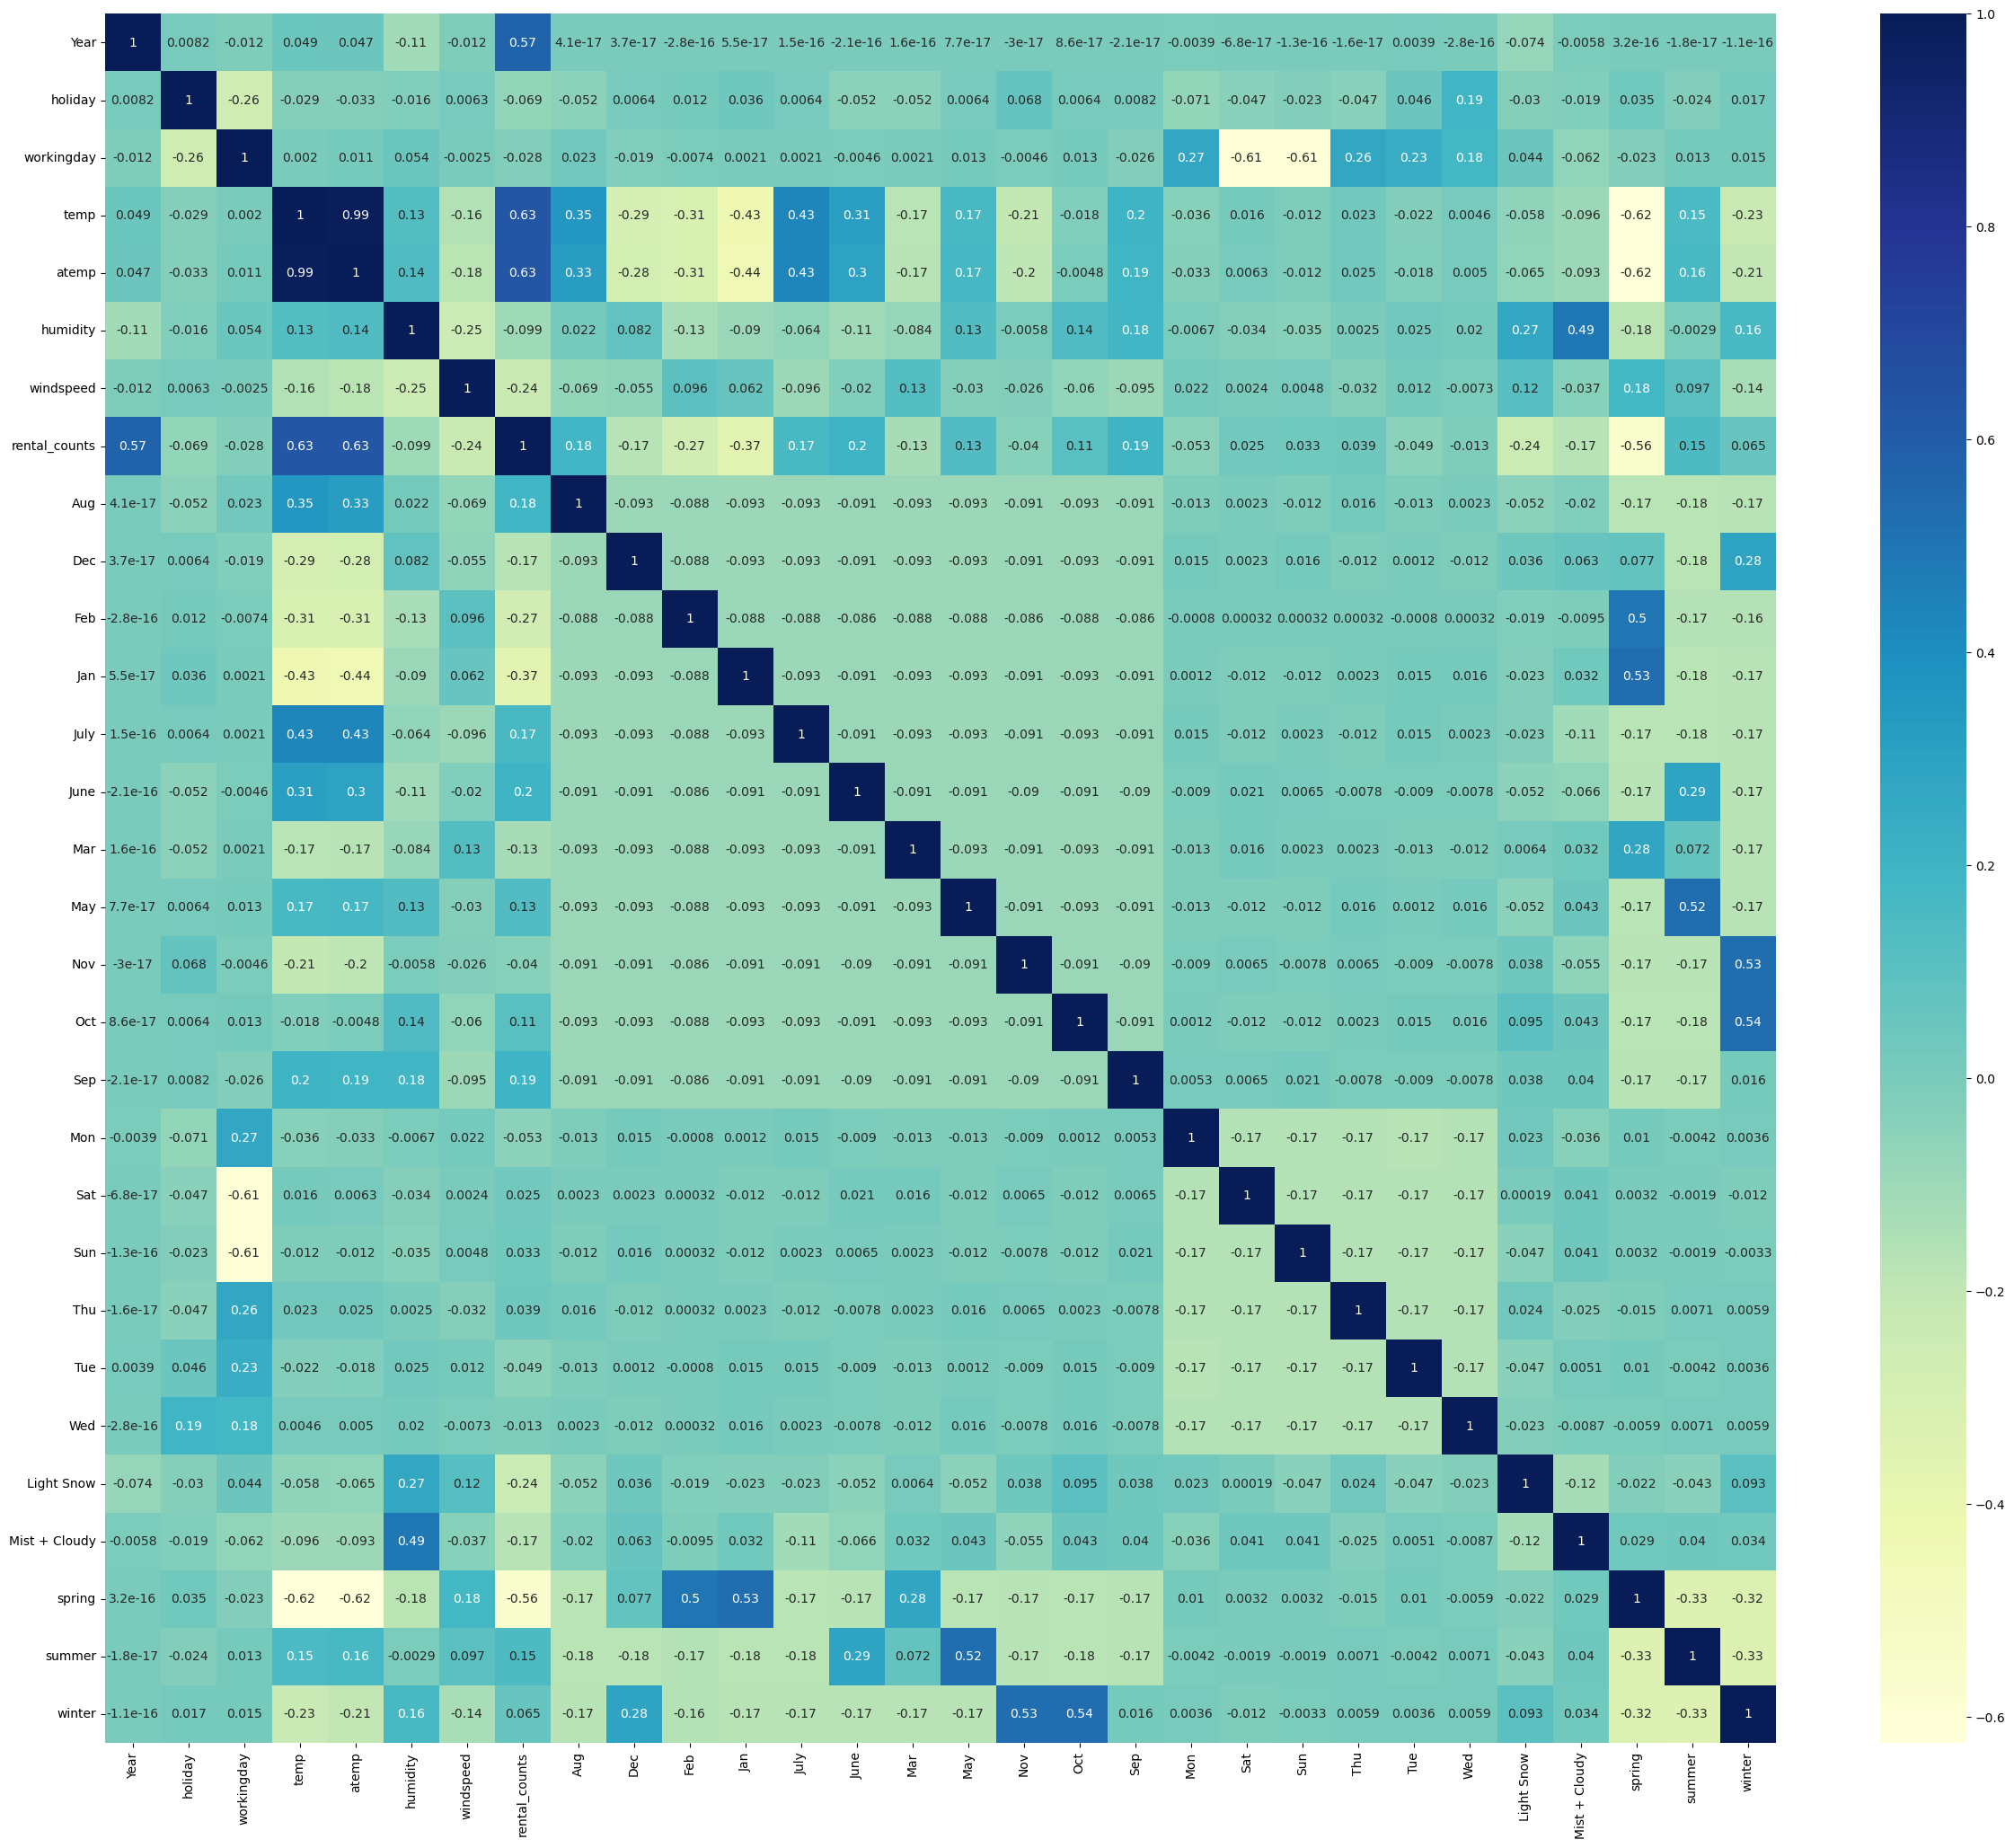

In [30]:
#Now, checking the correlation between variables again with the help of heatmap

plt.figure(figsize=(30, 25))
sns.heatmap(bikes.corr(), cmap='YlGnBu', annot = True)
plt.show()

Temp, Atemp and year are in good correlation with the 'count' variable and can play as important variables in influencing the bike rentals.

### Step 4: Splitting the Data into Training and Testing Sets
As we know, the first basic step for regression is performing a train-test split.

In [31]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
# We specify this so that the train and test data set always have the same rows, respectively
# It is generally good practice to split train size as 70% and test size as 30%.

bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, random_state = 100)

In [32]:
print(bikes_train.shape)
print(bikes_test.shape)

(510, 30)
(220, 30)


### Rescaling the Features

It is important to have all the variables on the same scale for the model to be easily interpretable. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

There are two common ways of rescaling:

 - Min-Max scaling (Normalisation):Between 0 and 1
 - Standardisation :mean-0, sigma-1
 
- We will be using Min-Max scaling here.
- We will scale our training dataset here as we want that our model should not completely learn the dataset.
- We will use "fit_transform" method on our dataset.


In [33]:
#importing the library
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

# Applying scaler() to all the numeric columns except the 'binary' and 'dummy' variables
#Create a list of numeric variables
num_vars=['temp','atemp','humidity','windspeed','rental_counts']

#Fitting scaler on num_vars and restoring back to data frame
bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])
bikes_train.head()

,Year,holiday,workingday,temp,atemp,humidity,windspeed,rental_counts,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,0,1,0,1,0


In [35]:
bikes_train.describe()

,Year,holiday,workingday,temp,atemp,humidity,windspeed,rental_counts,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


So, we can clearly see that the Maximum & Minimum value of all the numeric columns is between 1 & 0.

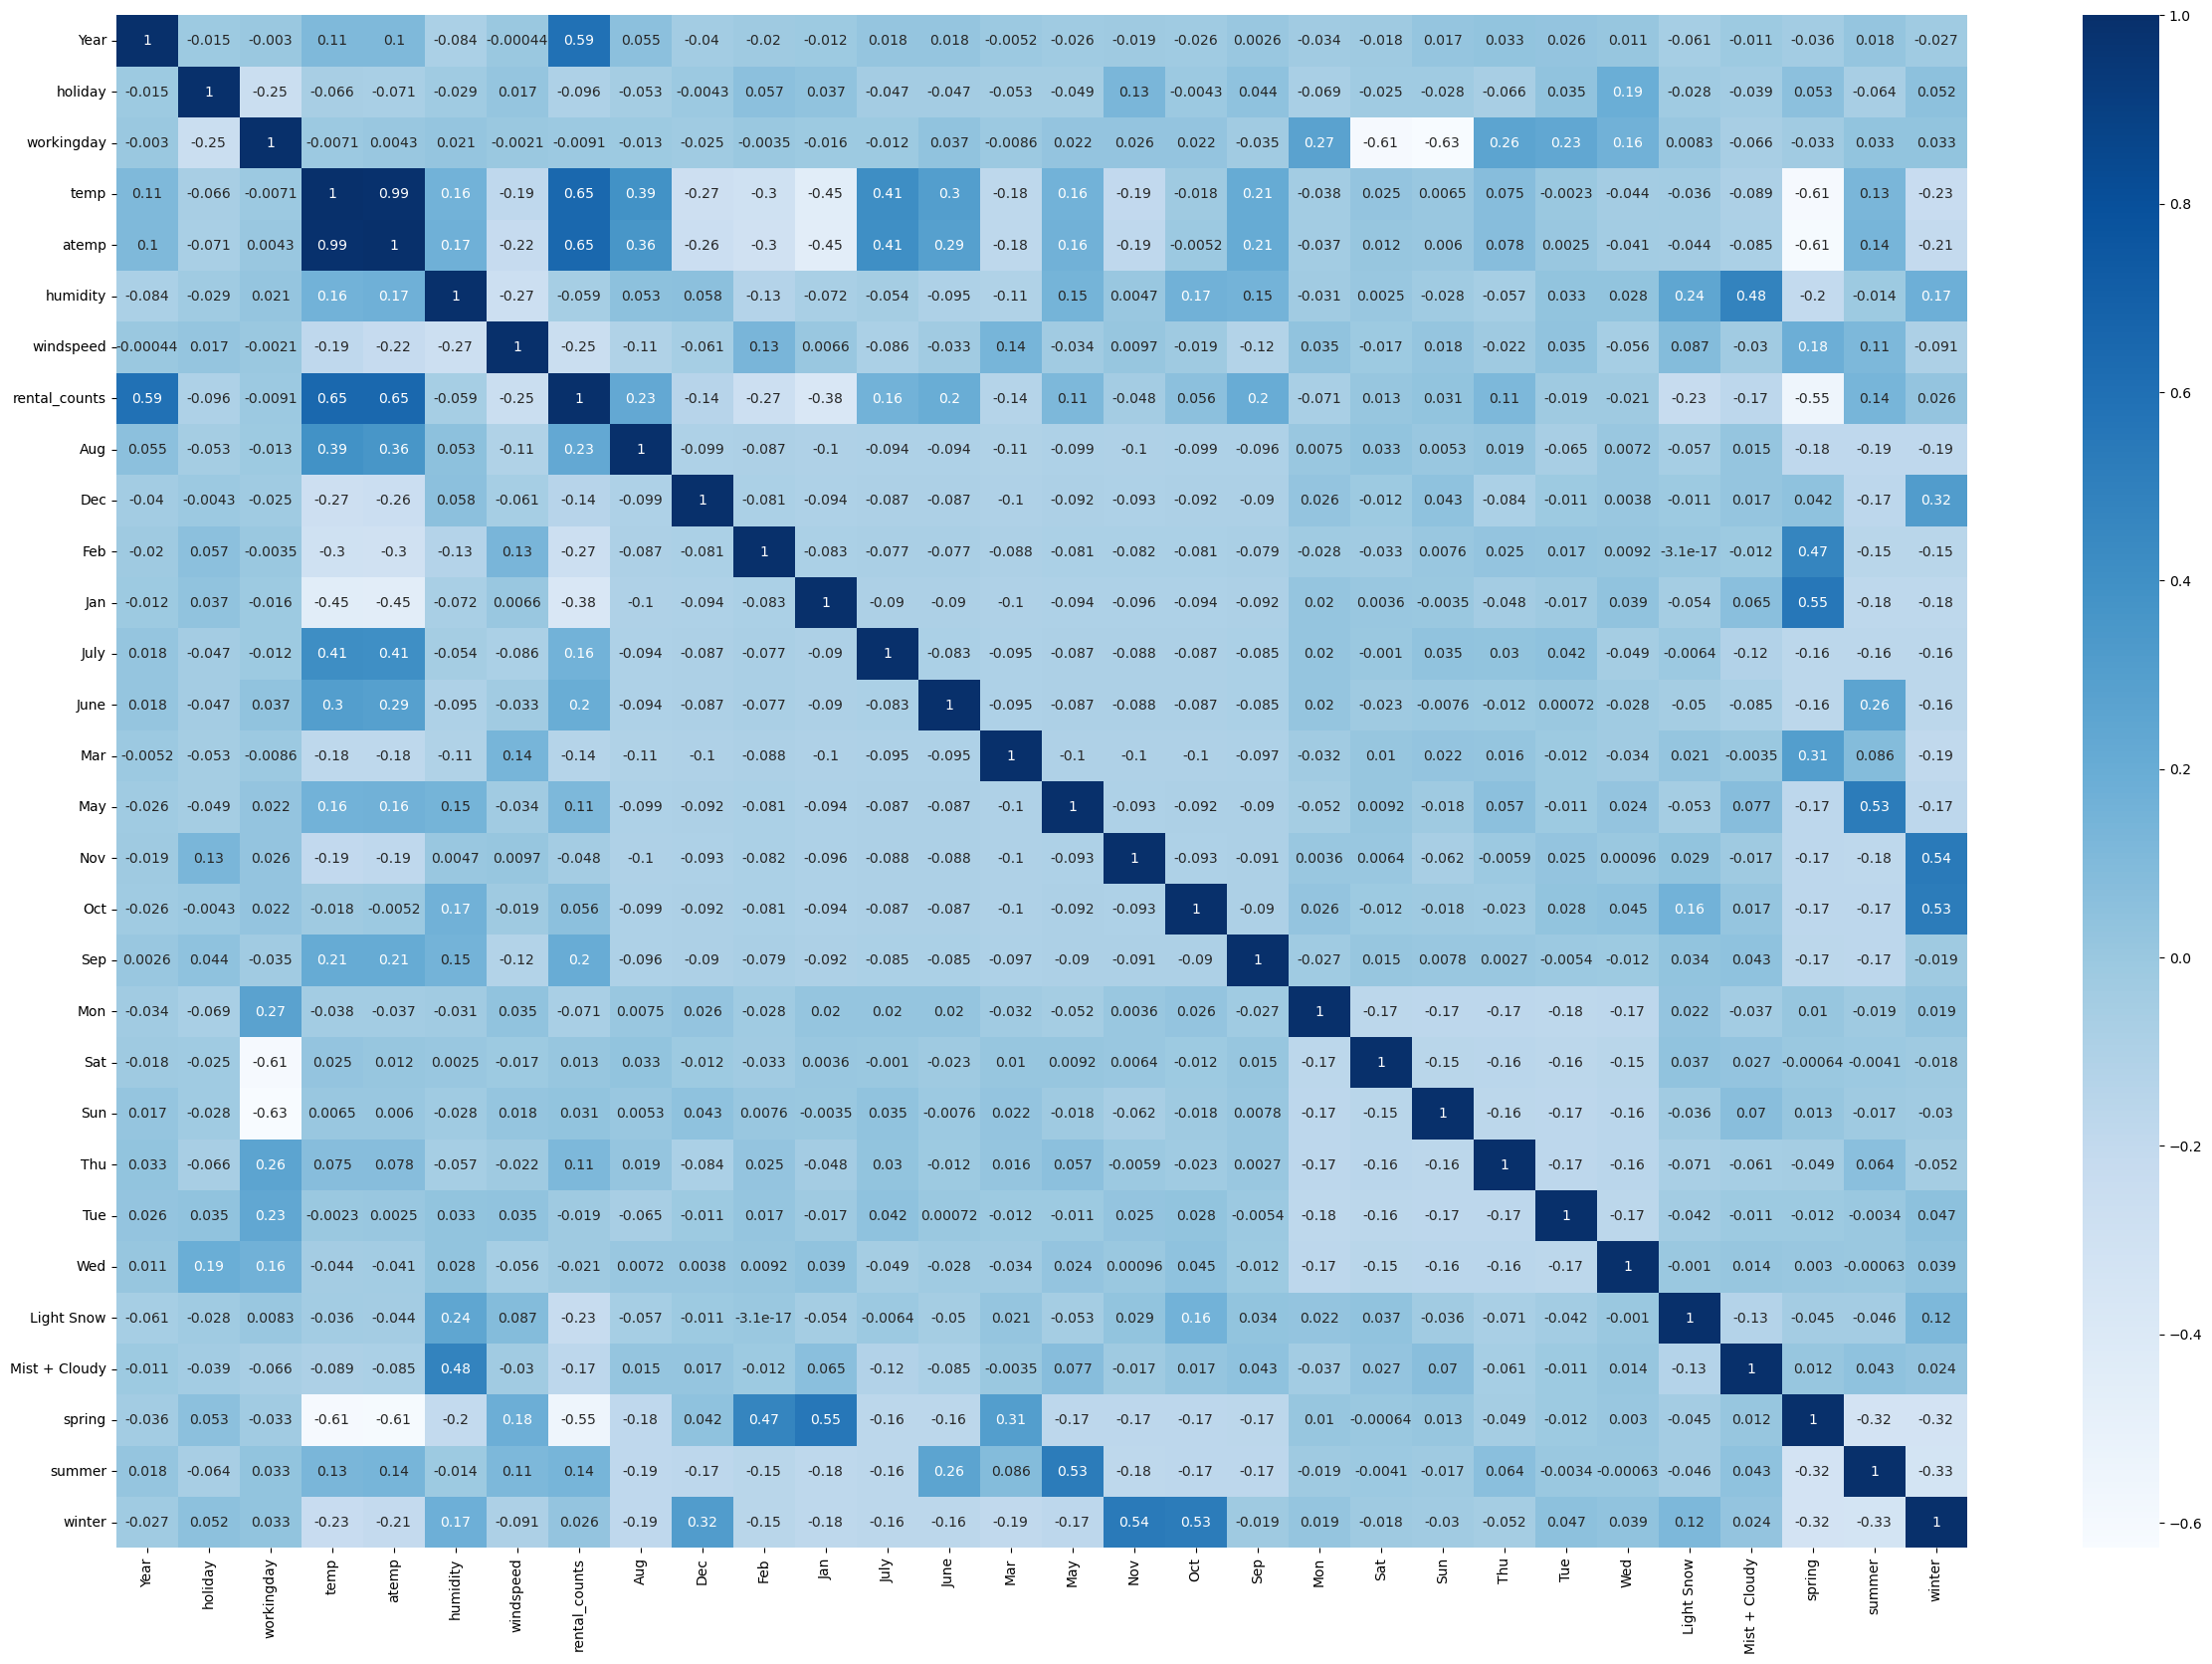

In [36]:
# Now, we will check the correlation coefficients to see which variables are highly correlated after scaling

plt.figure(figsize=(30, 20))
sns.heatmap(bikes_train.corr(),cmap='Blues',annot = True)
plt.show()

- So, as we can clearly see that after scaling both "temp" and "atemp" are highly correlated to each other (0.99) and also their correlation with target variable is also same. So, to avoid multicollinearity it is required to drop 1 of them.

- Also, after temp, year (0.59) has good correlation to the counts variable.
- August (0.23) & September (0.2) months also has good positive correlation.

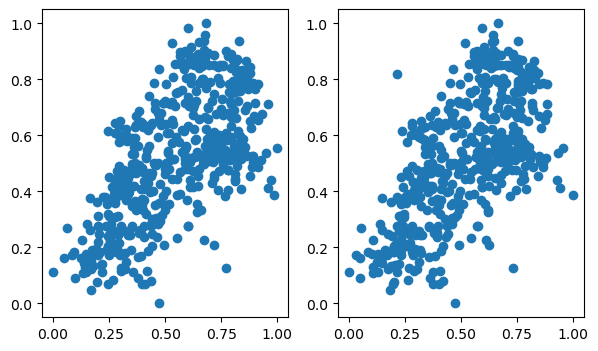

In [37]:
# Plotting Scatter plot for both "temp" & "atemp" to check pattern also
plt.figure(figsize=[7,4])

plt.subplot(1,2,1)
plt.scatter(bikes_train.temp, bikes_train.rental_counts)

plt.subplot(1,2,2)
plt.scatter(bikes_train.atemp, bikes_train.rental_counts)

plt.show()

- Patter of both variables with target variables is also similar
- As, both are equally correlated so, taking decision based on interpretability.
- It is better to understand "temp" w.r.t. "atemp" in real terms. So, dropping "atemp" here.

In [38]:
bikes_train.drop(['atemp'], axis = 1, inplace = True)
bikes_train.head()

,Year,holiday,workingday,temp,humidity,windspeed,rental_counts,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,0,0,...,0,1,0,0,0,0,1,0,1,0


#### Dividing dataset into X and Y for the model building

In [39]:
#Divide the data into X and y
y_train = bikes_train.pop('rental_counts')
X_train = bikes_train

In [40]:
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 28)


### Step 5: Building a linear model

- We will be using the combined approch (Atomated + Manual) to solve this problem. As we have large number of variables (29), it is not a good option to go manually alone.
- We will first use RFE and then manual approch to eliminate the variables based on p-values & VIF.

- we will be using the "LinearRegression" function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn).

In [41]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
# Running RFE with the output number of the variable equal to 15 (starting with 15 and will reduce later manually)

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
#let's see which columns are selected by the model
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

As we have seen from correlation matrix also, columns "temp", "year" and "Sep" were showing good correlation and are selected by the model.

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['Year', 'holiday', 'temp', 'humidity', 'windspeed', 'Dec', 'Jan',
       'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

#### Building model using "statsmodel", for the detailed statistics

In [46]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [47]:
#Importing statsmodels Library
import statsmodels.api as sm 

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [48]:
# Running the linear model
#Model-0
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [49]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          rental_counts   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          8.15e-189
Time:                        22:49:28   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859

So, we can infer the following from Model-1
1. R2: 0.845 & Adj.R-squared: 0.840 -- Pretty Good
2. Prob(F-Statistic) is almost 0, telling that model is overall good fit.
3. Non of the coeffient has p-value > 0.05, means very less multicollinearity.
4. Some variables have a negative coeffients.

Let's also check VIF for Redundancy.

In [50]:
#Dropping the constant term
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [51]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,Mist + Cloudy,2.32
0,Year,2.09
8,Nov,1.85
6,Jan,1.75


- So, as we know, in case of VIF, any value > 10 sholud be eliminated.
- By looking at very high VIF 'humidity' variable can be dropped as its redundent and can be explained fully by combination of other dependent variables.
- Dropping "humidity" variable.

In [52]:
#Dropping humidity
X_train_new1 = X_train_rfe.drop(["humidity"], axis = 1)

In [53]:
# Adding a constant variable 
X_train_lm1 = sm.add_constant(X_train_new1)

# Rebuilding the model without 'humidity'
#Model-1
lm1 = sm.OLS(y_train,X_train_lm1).fit()   

In [54]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:          rental_counts   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          4.75e-186
Time:                        22:49:28   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2450      0.032      7.618

So, we can infer the following from Model-1
1. R2: 0.839 & Adj.R-squared: 0.835 -- Pretty Good but dropped little from previous model. Not a significant change.
2. Prob(F-Statistic) is almost 0, telling that model is overall good fit.
3. Non of the coeffient has p-value > 0.05, means very less multicollinearity.
4. In previous model "Dec" had the p-value as 0.043 close too 0.050 but reduced (0.016) in this model.
4. Some variables have a negative coeffients.

In [55]:
# Again calculating the VIFs for the new model

#Dropping the constant term
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,Year,2.07
7,Nov,1.81
5,Jan,1.66
6,July,1.59
10,Mist + Cloudy,1.57


Now, by looking at VIF & P-value, we can say that - 
- "temp" column has VIF>5 but p-value 0. Also, it has a high coeff. (0.4387) so we should not drop it here.
- "Nov" column has P-value: 0.040 and VIF 1.81 and a coeff. of -0.0395. Although the vif & p-value is within range but coeff. is very less.

- So, we will drop the "Nov" column here and rebuild the model to check if our model's predictive power is same or has a significant drop. Also, "temp" VIF may be reduced by dropping " Nov" column.

In [56]:
#Dropping "Nov"
X_train_new2 = X_train_lm1.drop(["Nov"], axis = 1)

In [57]:
# Adding a constant variable 
X_train_lm2 = sm.add_constant(X_train_new2)

# Rebuilding the model without 'Nov'
#Model-2
lm2 = sm.OLS(y_train,X_train_lm2).fit()   

In [58]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:          rental_counts   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          2.74e-186
Time:                        22:49:28   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2283      0.031      7.310

In [59]:
# Again calculating the VIFs for the new model

#Dropping the constant term
X_train_lm2 = X_train_lm2.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.24
0,Year,2.07
12,winter,2.05
5,Jan,1.65
6,July,1.59
9,Mist + Cloudy,1.57
7,Sep,1.34


Now, by looking at VIF & P-value, we can say that - 
-  There is no significant drop in model predicting power. It is almost close to previous model.
- "temp" column still has VIF>5
- Now, "Dec" column has P-value: 0.08 > 0.05 and VIF 1.29.

- So, we will drop the "Dec" column here and rebuild the model to check if our model's predictive power is same or has a significant drop. Also, "temp" VIF may be reduced by dropping " Dec" column.

In [60]:
#Dropping "Dec"
X_train_new3 = X_train_lm2.drop(["Dec"], axis = 1)

In [61]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)

# Rebuilding the model without 'Dec'
#Model-3
lm3 = sm.OLS(y_train,X_train_lm3).fit()   

In [62]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:          rental_counts   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          8.14e-187
Time:                        22:49:28   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2154      0.030      7.088

In [63]:
# Again calculating the VIFs for the new model

#Dropping the constant term
X_train_lm3 = X_train_lm3.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,Year,2.07
11,winter,1.78
4,Jan,1.61
5,July,1.59
8,Mist + Cloudy,1.56
6,Sep,1.34


- After dropping "Dec" variable, the predictive power has not reduced significantly.
- Out of all the variables "Jan" variable has the highest p value as 0.033 and low VIF. We can drop it. Although it is under limit of 0.05, let's drop it and rebuild the model to check if our model's predictive power is same or has a significant drop.

In [64]:
#Dropping "Jan"
X_train_new4 = X_train_lm3.drop(["Jan"], axis = 1)

In [65]:
# Adding a constant variable 
X_train_lm4 = sm.add_constant(X_train_new4)

# Rebuilding the model without 'Jan'
#Model-4
lm4 = sm.OLS(y_train,X_train_lm4).fit()   

In [66]:
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:          rental_counts   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          5.06e-187
Time:                        22:49:28   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746

In [67]:
# Again calculating the VIFs for the new model

#Dropping the constant term
X_train_lm4 = X_train_lm4.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,Year,2.07
10,winter,1.78
4,July,1.58
7,Mist + Cloudy,1.55
5,Sep,1.34
6,Light Snow,1.08


- After dropping "Jan" variable, the predictive power has not reduced significantly.
- Out of all the variables "July" variable has the highest p value as 0.005 and low VIF. We can drop it. Although it is under limit of 0.05, let's drop it and rebuild the model to check if our model's predictive power is same or has a significant drop.

In [68]:
#Dropping "July"
X_train_new5 = X_train_lm4.drop(["July"], axis = 1)

In [69]:
# Adding a constant variable 
X_train_lm5 = sm.add_constant(X_train_new5)

# Rebuilding the model without 'July'
#Model-5
lm5 = sm.OLS(y_train,X_train_lm5).fit()   

In [70]:
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:          rental_counts   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          1.47e-186
Time:                        22:49:28   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1909      0.030      6.447

In [71]:
# Again calculating the VIFs for the new model

#Dropping the constant term
X_train_lm5 = X_train_lm5.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,Year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Mist + Cloudy,1.55
4,Sep,1.23
5,Light Snow,1.08
1,holiday,1.04


- After dropping "July" variable, VIF of "windspeed" has come under 5 and also the predictive power has not reduced significantly.
- Now,out of all the variables "spring" variable has the highest p value as 0.008 and low VIF. We can drop it. Although it is under limit of 0.05, let's drop it and rebuild the model to check if our model's predictive power is same or has a significant drop.

In [72]:
#Dropping "spring"
X_train_new6 = X_train_lm5.drop(["spring"], axis = 1)

# Adding a constant variable 
X_train_lm6 = sm.add_constant(X_train_new6)

# Rebuilding the model without 'spring'
#Model-6
lm6 = sm.OLS(y_train,X_train_lm6).fit()

#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:          rental_counts   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          2.83e-186
Time:                        22:49:28   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1259      0.017      7.508

In [73]:
# Again calculating the VIFs for the new model

#Dropping the constant term
X_train_lm6 = X_train_lm6.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,Year,2.00
7,summer,1.57
6,Mist + Cloudy,1.48
8,winter,1.37
4,Sep,1.20
5,Light Snow,1.08
1,holiday,1.04


- After dropping "spring" variable, the predictive power has not reduced significantly.

- Now, all the variables has p-value = 0 and VIF < 5.
- It seems like we have reached the best model fit with r2 =  0.830 and adj. r2 = 0.827

In [74]:
# Adding a constant back 
X_train_lm6 = sm.add_constant(X_train_lm6)
X_train_lm6 

,const,Year,holiday,temp,windspeed,Sep,Light Snow,Mist + Cloudy,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,1,0


### Residual Analysis of the train data

Checking assumpitions of Linear Regression.

In [75]:
#y train predicted
y_train_pred = lm6.predict(X_train_lm6)

<Figure size 640x480 with 0 Axes>

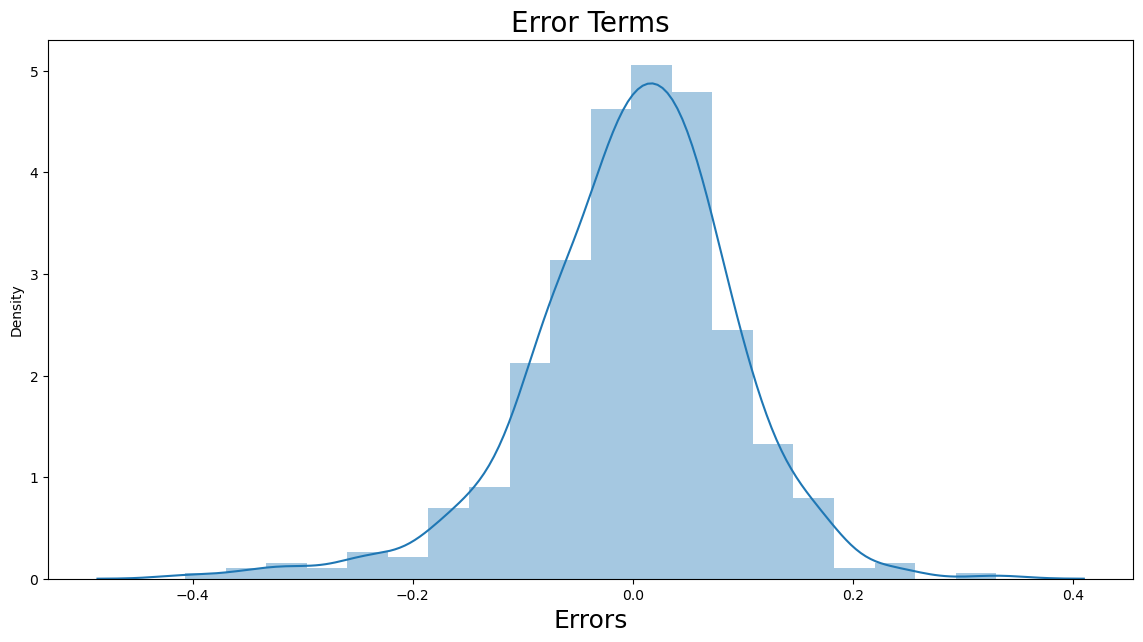

In [76]:
# Plot the histogram of the error terms

fig = plt.figure()

plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)

plt.title('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

In [77]:
# Calculating Mean of Error Terms
np.mean(y_train - y_train_pred)

-1.214170376440551e-16

- Assumption Check-We can see that "Error terms" are normally distributed and centered around 0 (Mean almost 0).
- We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

**Looking for patterns in the residuals**

In [79]:
error_terms=(y_train - y_train_pred)

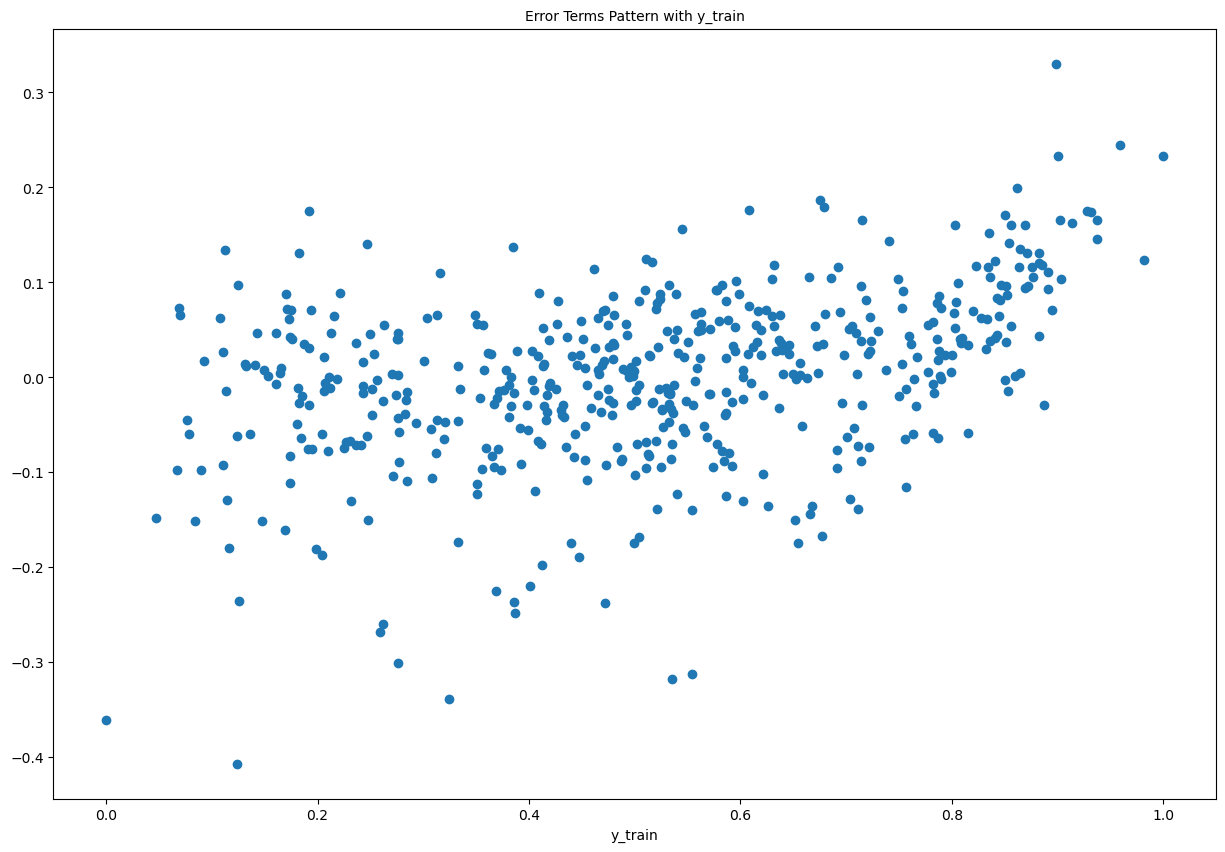

In [81]:
plt.figure(figsize=(15,10))
plt.scatter(y_train,error_terms)
plt.title('Error Terms Pattern with y_train', fontsize = 10) 
plt.xlabel('y_train', fontsize = 10) 
plt.show()

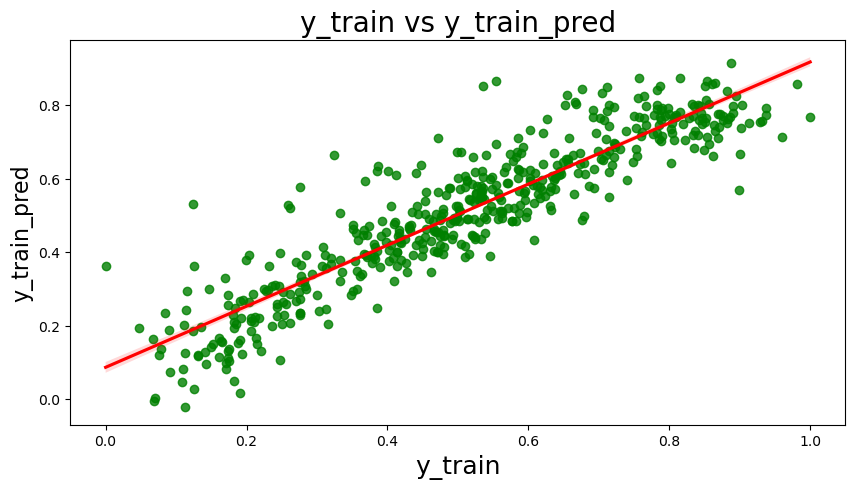

In [82]:
#Regression plot
plt.figure(figsize=(10,5))
sns.regplot(x=y_train, y=y_train_pred, ci=80, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.title('y_train vs y_train_pred', fontsize=20)
plt.xlabel('y_train', fontsize=18)
plt.ylabel('y_train_pred', fontsize=16)   
plt.show()

### Step 6: Predictions on the Test Set

Applying the scaling on the test sets

In [83]:
# Applying scaler() to all the numeric columns except the 'binary' and 'dummy' variables
#Create a list of numeric variables
num_vars=['temp','atemp','humidity','windspeed','rental_counts']

#Fitting scaler on num_vars and restoring back to data frame
bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])
bikes_test.head()

,Year,holiday,workingday,temp,atemp,humidity,windspeed,rental_counts,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [84]:
#Dividing into X_test and y_test
y_test = bikes_test.pop('rental_counts')
X_test = bikes_test

In [85]:
X_test.describe()

,Year,holiday,workingday,temp,atemp,humidity,windspeed,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.059091,0.086364,0.100000,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.236333,0.281541,0.300684,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new6.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Year,holiday,temp,windspeed,Sep,Light Snow,Mist + Cloudy,summer,winter
184,1.0,0,1,0.831783,0.084219,0,0,1,0,0
535,1.0,1,0,0.901354,0.153728,0,0,0,1,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,1,0


In [87]:
# Making predictions
y_test_pred = lm6.predict(X_test_new1)

In [88]:
#Finding R-squared and Adjusted R-Squared for Test set
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.7941977535477243

In [89]:
X_test_new.shape

(220, 9)

In [90]:
#Adjusted R2

#adj r2=1-((1-R2)*(n-1)/(n-p-1))

#n =sample size , p = number of independent variables
n=X_test_new.shape[0]
p=X_test_new.shape[1]
adj_r2=1-(1-0.7941977535477243)*(n-1)/(n-p-1)
print(adj_r2)

0.7853776572711981


### Step 7: Model Evaluation

<Figure size 640x480 with 0 Axes>

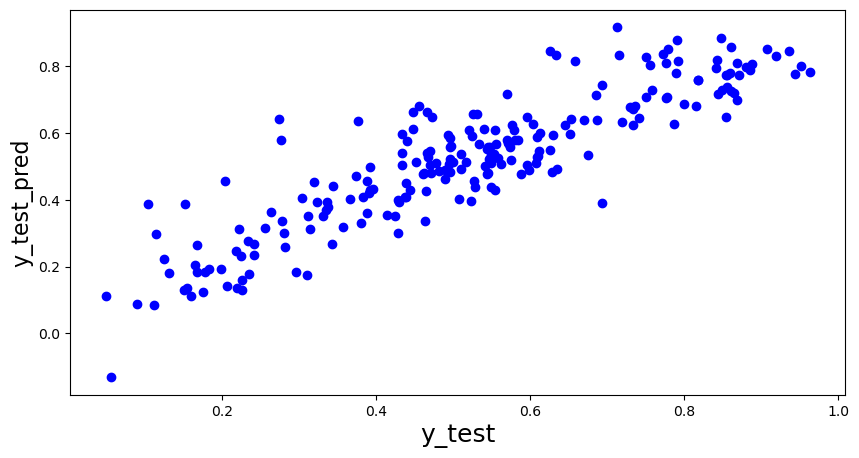

In [91]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_test_pred,color='blue')
fig.suptitle('y_test vs y_test_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                   
plt.ylabel('y_test_pred', fontsize=16)  
plt.show()

### Visualising the fit on the test set

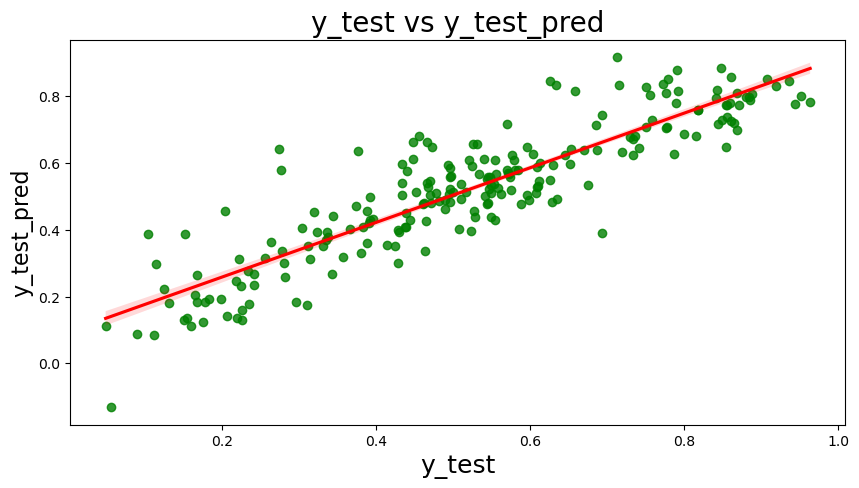

In [92]:
#Regression plot
plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=y_test_pred, ci=80, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)   
plt.show()

In [93]:
lm6.params

const            0.125926
Year             0.232861
holiday         -0.098685
temp             0.548008
windspeed       -0.153246
Sep              0.101195
Light Snow      -0.282869
Mist + Cloudy   -0.078375
summer           0.088080
winter           0.129345
dtype: float64

***The equation for best fitted line is:***

$rental_counts= 0.125926 + 0.232861 \times Year + 0.548008 \times temp + 0.101195 \times Sep + 0.088080 \times summer + 0.129345 \times winter -0.098685 \times holiday -0.153246 \times windspeed -0.282869 \times Light Snow -0.078375 \times (Mist+Cloudy)$

### Analysis  Comparison between Train model and Test: 

- Train-Set R^2 :  0.830

- Train-Set-Adjusted R^2 : 0.827

- Test-Set-R^2: 0.794

- Test-Set-Adjusted R^2: 0.785

- Difference in R^2 between train-set and test-set: 3.6%

- Difference in adjusted R^2 between train-set and test-set: 4.2% 

**- Since difference between Train-Set-Adjusted R^2 and Test-Set-Adjusted R^2 is less than 5%, we can conclude that this model is best fitted.**

In [94]:
lm6.params.sort_values(ascending= False)

temp             0.548008
Year             0.232861
winter           0.129345
const            0.125926
Sep              0.101195
summer           0.088080
Mist + Cloudy   -0.078375
holiday         -0.098685
windspeed       -0.153246
Light Snow      -0.282869
dtype: float64

### Observations from the results:


-  We can see that temperature variable is having the highest coefficient 0.548008, which means it will contribute maximum (+ve) in predicting rental counts.


- From the equation, by looking at the coefficients we can say that following are the top 3 features contributing significantly towards explaining the demand of the shared bikes:
    1. Temp. (0.548008)
    2. Year (0.232861)
    3. Light Snow (-0.282869) – Negatively Correlated
    

- We have observed from the box plot only that out of all weather situation, in "Light Snow" weather demand were least and it is reflecting here as it is negatively correlated with significant coeffient.


- From the box plot only, we have seen that demand for bikes were more in 2019 as compared to 2018.


#### Problem Statement & Answer
- The company wants to know:
 - Q1 Which variables are significant in predicting the demand for shared bikes ?
 - Q2 How well those variables describe the bike demand ?
 
- So, after creating the dummy variables we had total 30 variables out of which we have selected 9 variables which are explaining approximately 80% of variance (Ans. to Q.2) in the dataset 

- From those 9 variables, top 3 significant variables are : (Ans. to Q.1) 
    - Temp. (0.548008)
    - Year (0.232861)
    - Light Snow (-0.282869) – Negatively Correlated